In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
!pip install git+https://github.com/huggingface/transformers.git@main

  Cloning https://github.com/huggingface/transformers.git (to revision main) to /tmp/pip-req-build-jhe3qvdz
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-jhe3qvdz
  Resolved https://github.com/huggingface/transformers.git to commit 67b85f24def79962ce075353c2627f78e0e53e9f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.1 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.32.0.dev0-py3-none-any.whl size=7447975 sha256=8ca17bd618998ab5de31d20c135741e6bfa8b15a83b74feda83fc7884d4898dd
  Stored in directory: /tmp/pip-ephem-wheel-cache-imvfvlwp/wheels/cf/59/82/6492402e887a68975030bf8c06532260

In [3]:
import os
import glob
from PIL import Image
from collections import Counter
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader,Dataset
import torchvision.transforms as T
import requests
from transformers import BlipProcessor, BlipForConditionalGeneration

In [4]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

In [5]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [7]:
import pickle

# 指定之前保存的模型文件路径
model_file_path = '/content/drive/MyDrive/Colab Notebooks/final_project/model/trained_model_crazy.pkl'  # 根据你的实际情况修改路径和文件名

# 使用pickle模块加载模型
with open(model_file_path, 'rb') as file:
    model = pickle.load(file)

# 使用加载的模型进行预测
# 假设你有一个名为data的待预测数据
# predictions = loaded_model.predict(data)


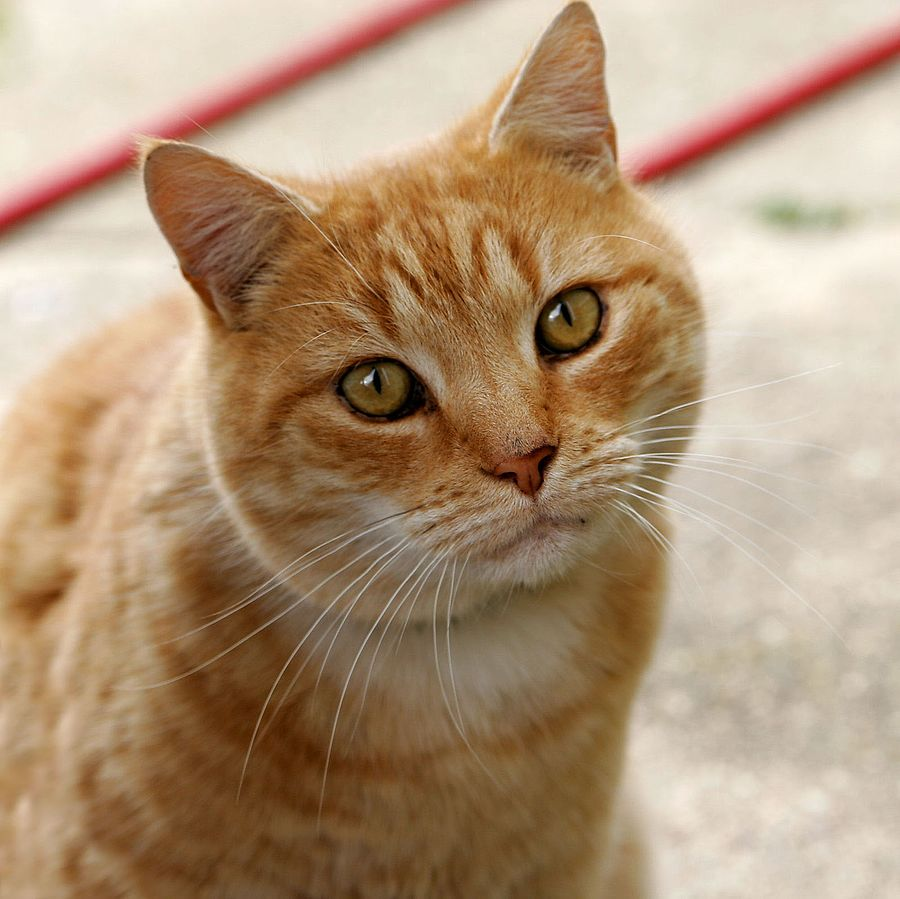

In [8]:
# image = Image.open('/content/drive/MyDrive/Colab Notebooks/final_project/data/iStock.jpg')
# image = Image.open('/content/drive/MyDrive/Colab Notebooks/final_project/data/101.jpg')
image = Image.open('/content/drive/MyDrive/Colab Notebooks/final_project/data/Cat03.jpg')
image

In [9]:
inputs = processor(images=image, return_tensors="pt").to(device)
pixel_values = inputs.pixel_values

generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

cats carry a parasite, eek!
